# Week 2

HW for Week 3: 

    Review ch 1, 2, appendices

    Read ch 3

## Algorithms

**Data Types**: 

    continuous - a range of values, infinite/finite but unbounded
    
    ordinal - discrete and order-able, does not have to a numerical classification scheme
    
    nominal - non-numeric (typically descriptive) without natural/meaningful ordering. categorical

**Algorithmic Efficiency (for N data points in D dimensions)**:
    
    O(N) notation - setup time + (some constant) * N
    
        example: 2point correlation fxn counts the incidence of galaxy pairs as a function of distance, O(N^2)
        
        example: 3point correlation fxn, would expect O(N^3).
        
    What O(N) do we aim for? For many problems, O(N) seems impossible, but O(N logN) is often achievable. Examples of speedup methods:
    
        - Trees have a divide-conquer-merge design, capable of achieving O(N) for sufficiently high "region-chopping tolerance". But the efficiency depends on the problem -- wouldn't use for solving problems that are already O(N).
        
            -- Quad/octrees split up data into cells with existing data, down to some refinement level, then test grid boundaries. Good for 2 dimensional splitting, but does not scale well to more dimensions.
            -- KDTrees are good for multi-dimensional trees, but not necessarily good for 2d data
            -- Ball trees create N-D hyperspheres and use hyperspherical boundaries
        
        - Parallel computing is an efficient way to perform a "choppable problem". Only reduces run-time by a factor of n cores.
        
        - Sorting is a function of both how well a method scales +  the N-dependent efficiency.


## Basic Probability

Events:

    Probability that either statement A or B is true: p(A $\bigcup$ B) = p(A) + p(B) - p(A $\bigcup$ B)

    Probability that both A and B are true: p(A $\bigcup$ B) = p(A|B)p(B) = p(B|A)p(A)

    For a set of $i$ events: $p(A|C) = \sum p(A|C\bigcap B_i)p(B_i|C)$

**Joint probability**: Probability of both x and y being true. Full.

**Marginal probability**: Project one dimension, collapse down to N-1 dimensions. Projected.

**Conditional probability**: Fix one dimension, calculate the probability for other dimensions, ex: p(x|y=1.5). Slices.

**Random variables**: x, y are independent IFF $p(x,y) = p(x)p(y)$. If x,y are independent, then $p(x,y) = p(x|y)p(y) = p(y|x)p(x)$. We can reorient this into Bayes' Rule:

$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$

    Its common to say we don't know p(x), but we can rewrite this as:
    
$p(y|x) = \frac{p(x|y)p(y)}{\int p(x|y)p(y)dy}$

# Hack

In [1]:
from astroML.datasets import fetch_sdss_S82standards
from astroML.plotting import scatter_contour
from astroML.stats import binned_statistic_2d

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import scipy.stats.kde as kde

Fetching the Stripe 82 catalog as well as the 2MASS cross-matched catalog:

In [27]:
data1 = fetch_sdss_S82standards()
data2 = fetch_sdss_S82standards(crossmatch_2mass = True)

The 2MASS-matched catalog is roughly 30% as large as the full Stripe82 catalog, which we see as a truncated color-color plot. There is less spread in the main sequence, and fewer outlying stars.

Text(0.5,0,'g-r')

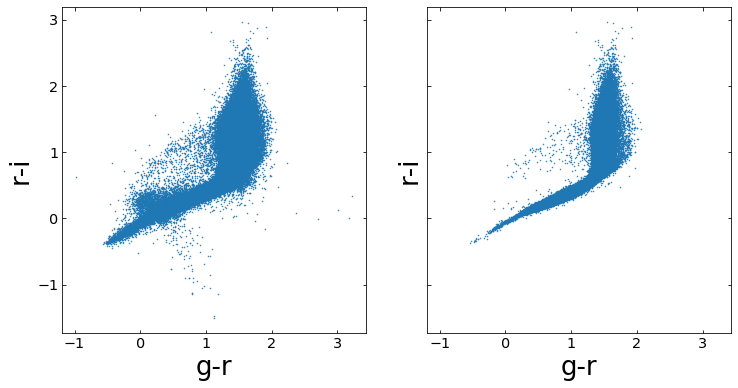

In [221]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

ra, dec = data1['RA'], data1['DEC']
gmr1 = data1['mmu_g'] - data1['mmu_r']
rmi1 = data1['mmu_r'] - data1['mmu_i']

ax1.plot(gmr1, rmi1, '.', ms=1)
ax1.set_ylabel('r-i', fontsize=26)
ax1.set_xlabel('g-r', fontsize=26)

gmr2 = data2['mmu_g'] - data2['mmu_r']
rmi2 = data2['mmu_r'] - data2['mmu_i']

ax2.plot(gmr2, rmi2, '.', ms=1)
ax2.set_ylabel('r-i', fontsize=26)
ax2.set_xlabel('g-r', fontsize=26)


In [190]:
gmr1ivar = data1['msig_g']**2 * data1['mmu_g']**2 + data1['msig_r']**2 * data1['mmu_r']**2
rmi1ivar = data1['msig_r']**2 * data1['mmu_r']**2 + data1['msig_i']**2 * data1['mmu_i']**2

Nobs = data1['Nobs_g'] + data1['Nobs_r'] + data1['Nobs_i']

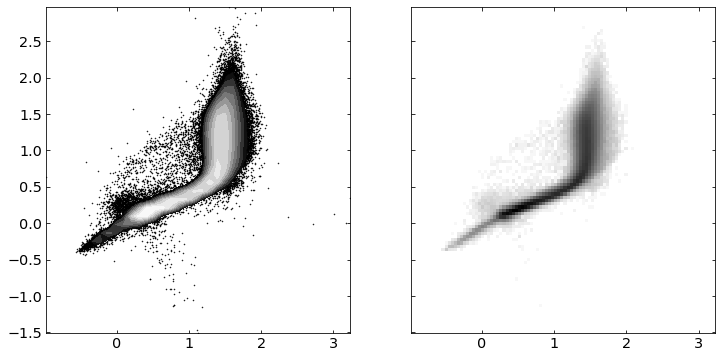

In [194]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

scatter_contour(gmr1, rmi1, threshold=200, log_counts=True, ax=ax1, histogram2d_args={'bins':40}, contour_args={'cmap': 'Greys_r'}, plot_args={'color':'k', 'ms':1})
ax1.set_ylim(-0.6,2.5)
ax1.set_xlim(-0.6,2.5)

H, xbins, ybins, _ = ax2.hist2d(gmr1, rmi1, cmap='Greys', bins=100, norm=LogNorm())
#ax2.imshow(np.log10(H).T, cmap='Greys', extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]], interpolation=True)


/home/ray/anaconda3/envs/paper1/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


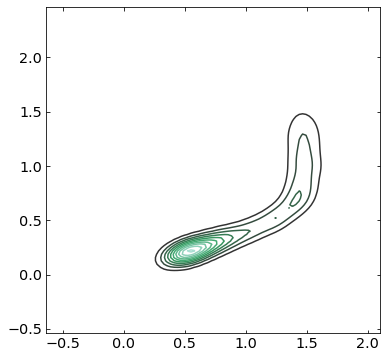

In [196]:
from seaborn import kdeplot
f, ax = plt.subplots(1, 1, figsize=(6,6))

kdeplot(gmr1[:10000], rmi1[:10000])

In [238]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt


def create_retro_map(image, num_columns, num_rows, spacing=1, norm=True,
                     stat=np.sum, plot_3d=False):
    if norm:
        image = normalize(image)

    low_res_image, bins_x, bins_y = reduce_res(image, num_columns, num_rows,
                                               stat)
    if plot_3d:
        pass
    else:
        retro_map(low_res_image, bins_x, bins_y, spacing)


def normalize(image):
    norm = abs(image.sum())
    norm_image = image / norm
    return norm_image


def reduce_res(image, num_columns, num_rows, stat):
    low_res_image = np.zeros((num_columns, num_rows))
    len_x = image.shape[0]
    len_y = image.shape[1]

    assert num_columns < len_x, "Oversampling"
    assert num_rows < len_y, "Oversampling"

    bins_x = np.linspace(0, len_x - 1, num_columns)
    bins_y = np.linspace(0, len_y - 1, num_rows)

    xspace = np.linspace(0, len_x - 1, len_x)
    yspace = np.linspace(0, len_y - 1, len_y)

    digitize_x = np.digitize(xspace, bins_x, right=True)
    digitize_y = np.digitize(yspace, bins_y, right=True)

    for i, j in product(range(1, num_columns+1), range(1, num_rows+1)):
        ix_x = digitize_x == i
        ix_y = digitize_y == j
        im = image[ix_x, :][:, ix_y]
        low_res_image[i - 1, j - 1] = stat(im)

    return low_res_image, bins_x, bins_y


def retro_map(image, bins_x, bins_y, spacing, ax=None):
    if ax == None:
        f, ax = plt.subplots(1, 1, figsize=(6, 6))
    else:
        f = ax.figure

    image_range = abs(image.max() - image.min())

    assert spacing > 0, "Spacing must be greater than zero"
    offset_arr = np.linspace(0,
                             len(bins_y) - 1,
                             len(bins_y)) * image_range * spacing
    for row, offset in zip(image, offset_arr):
        ax.plot(bins_x, row + offset, color='C0')

    ax.set_yticklabels('')
    ax.set_xticklabels('')
    ax.set_xticks([])
    ax.set_yticks([])

    f.tight_layout()
    f.show()

/home/ray/anaconda3/envs/paper1/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Text(0.5,50,'g-r')

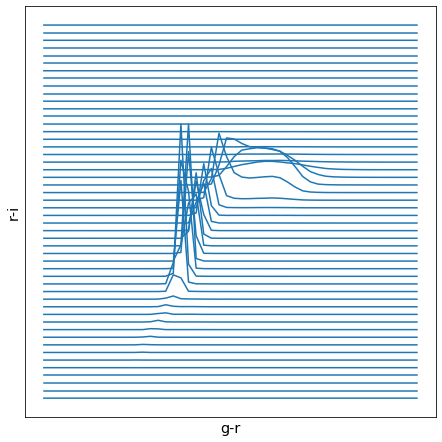

In [248]:
f, ax = plt.subplots(1, 1, figsize=(6,6))

nbins = 50
H, xbins, ybins = np.histogram2d(gmr1, rmi1, bins=nbins)

bins = np.linspace(-0.5, 2.5, nbins)
retro_map(H, bins, bins, 0.05, ax)

ax.set_ylabel('r-i')
ax.set_xlabel('g-r')